In [1]:
import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\admin\Downloads\Amazon Sale Report.csv\Amazon Sale Report.csv")
df.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_13912\3064602561.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\admin\Downloads\Amazon Sale Report.csv\Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Check for Missing Values

In [2]:
# Check for missing values in the dataset
df.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

Convert Date Column to Datetime

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

# Verify the conversion
df['Date'].head()


0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]

In [4]:
import matplotlib.pyplot as plt

Bar Chart - Product-wise Sales

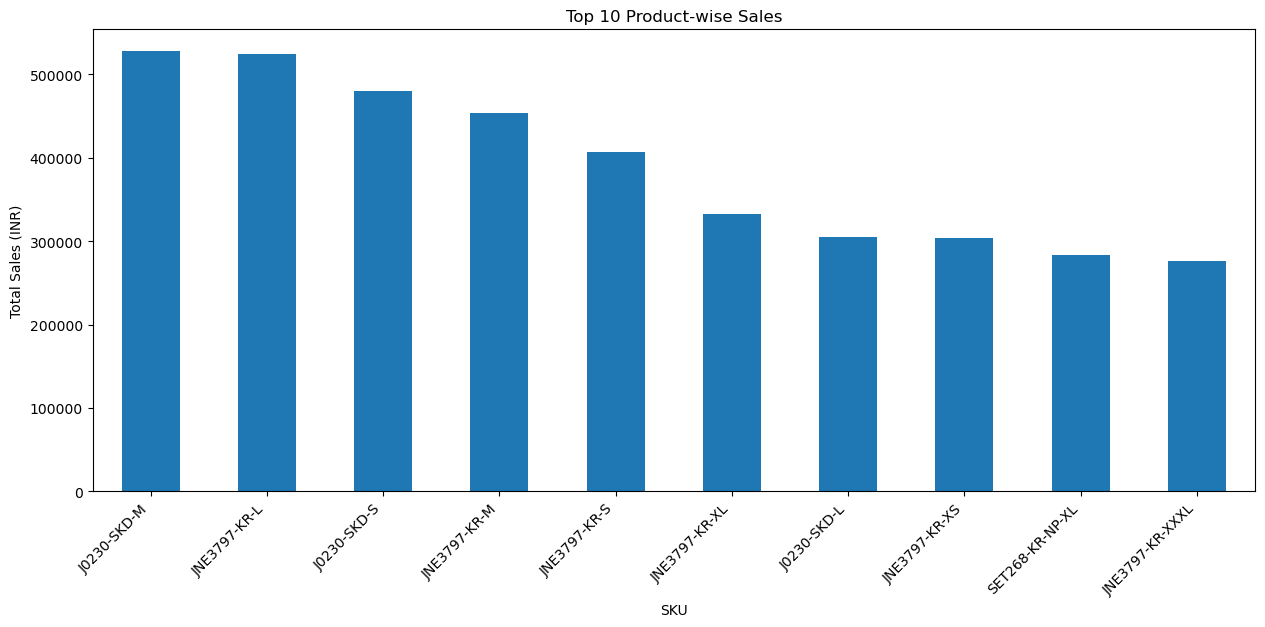

In [5]:


# Group by 'SKU' and sum the 'Amount'
product_sales = df.groupby('SKU')['Amount'].sum().sort_values(ascending=False)

# Display only the top 10 products by sales
top_n = 10  # You can change this number
top_product_sales = product_sales.head(top_n)

plt.figure(figsize=(15, 6))
top_product_sales.plot(kind='bar')

# Adjust title and labels
plt.title('Top 10 Product-wise Sales')
plt.xlabel('SKU')
plt.ylabel('Total Sales (INR)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


Top-Selling Product: The SKU "PD203-SC40-M" has the highest sales, slightly above 500,000 INR.
Second Highest: The SKU "JNE3797-XR-L" closely follows with a similar sales figure, just under 500,000 INR.
Sales Distribution: The sales gradually decrease from left to right, indicating that the top-selling products have significantly higher sales compared to others in the top 10 list.
Range of Sales: The top SKU's sales are just over 500,000 INR, while the 10th SKU, "JNE3797-XR-XXXL", has sales slightly above 350,000 INR.
Product Variety: The SKUs suggest a variety of products, likely of different sizes or variations (indicated by "M", "L", "XL", etc.), with "JNE" and "PD" being common prefixes.

Pie Chart - Region-wise Sales

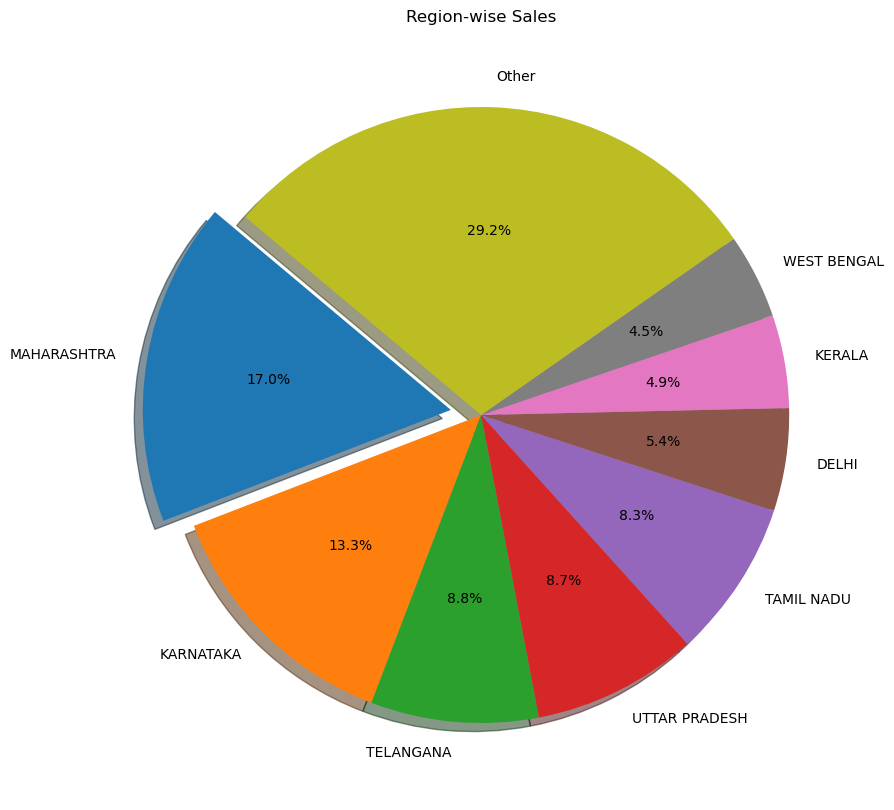

In [6]:


# Group by 'ship-state' and sum the 'Amount'
region_sales = df.groupby('ship-state')['Amount'].sum()

# Sort the values and aggregate smaller regions
top_n = 8  # Show the top 8 regions, and aggregate the rest
top_region_sales = region_sales.sort_values(ascending=False).head(top_n)
other_sales = region_sales.sum() - top_region_sales.sum()
top_region_sales['Other'] = other_sales

# Plot the pie chart
plt.figure(figsize=(10, 10))  # Increase the figure size

# Explode the largest slice
explode = [0.1] + [0] * (len(top_region_sales) - 1)

# Plot with an autopct and exploding the largest slice
top_region_sales.plot(kind='pie', autopct='%1.1f%%', explode=explode, shadow=True, startangle=140)

# Add a title and remove the y-label
plt.title('Region-wise Sales')
plt.ylabel('')

plt.show()


Dominant Region: The "Other" category is the largest, accounting for 29.2% of total sales. This suggests a significant portion of sales is spread across regions outside the top 8.

Top Region: Maharashtra is the single largest region, contributing 17.0% of total sales, making it the most significant market among the named regions.

Other Major Regions:

Karnataka follows with 13.3% of total sales.
Telangana (8.8%) and Uttar Pradesh (8.7%) have nearly equal contributions.
Tamil Nadu accounts for 8.3% of total sales.
Minor Regions:

Delhi (5.4%), Kerala (4.9%), and West Bengal (4.5%) are the smallest contributors among the top 8 regions.
Sales Distribution: The sales distribution is quite diverse, with a noticeable concentration in Maharashtra, Karnataka, and Telangana. However, the "Other" regions collectively surpass any individual region, indicating that the sales network is widespread.

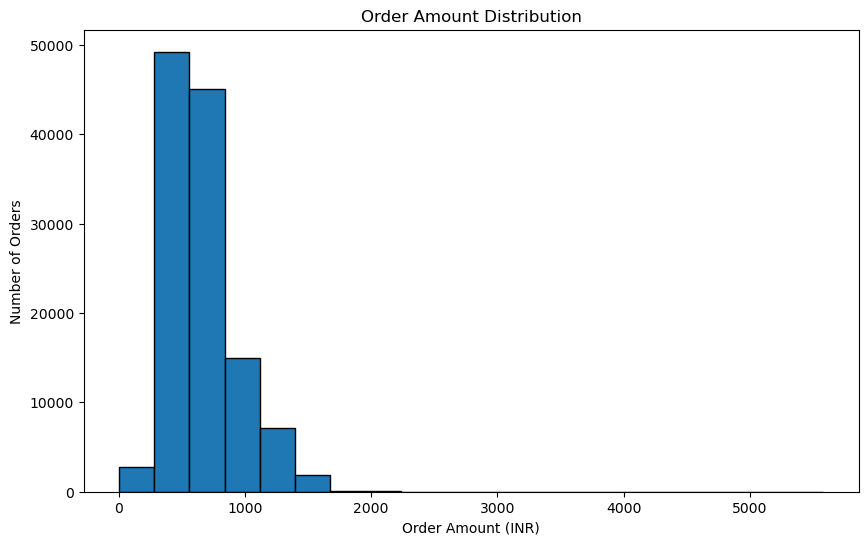

In [7]:
# Plot the histogram of 'Amount'
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=20, edgecolor='black')
plt.title('Order Amount Distribution')
plt.xlabel('Order Amount (INR)')
plt.ylabel('Number of Orders')
plt.show()


Skewed Distribution: The histogram shows a right-skewed distribution, where the majority of the orders are clustered towards the lower end of the order amount range.

Most Common Order Range: The highest frequency of orders is in the range of 0 to 1000 INR, with the peak number of orders around this range. Specifically, the majority of orders fall below 1000 INR, indicating that smaller order amounts are more common.

Decreasing Frequency: As the order amount increases, the number of orders decreases sharply. There are significantly fewer orders in the range of 1000 to 2000 INR.

Rare High-Value Orders: Orders above 2000 INR are quite rare, with very few orders exceeding 3000 INR.

Order Concentration: The concentration of orders below 1000 INR suggests that the business deals predominantly in lower-value transactions.

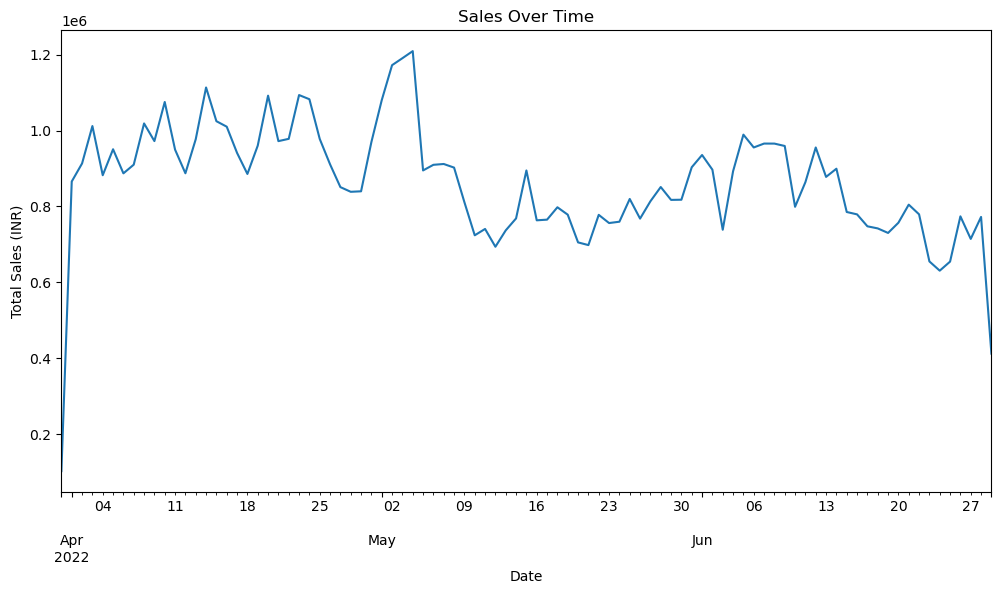

In [8]:
# Group by 'Date' and sum the 'Amount'
daily_sales = df.groupby('Date')['Amount'].sum()

# Plot the timeline chart
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.show()


The image shows a line chart of "Sales Over Time" plotted using matplotlib in Python. The chart visualizes the total sales (in INR) over different dates, as indicated by the X and Y axes labels.

In [9]:
# Print column names to verify
print(df.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


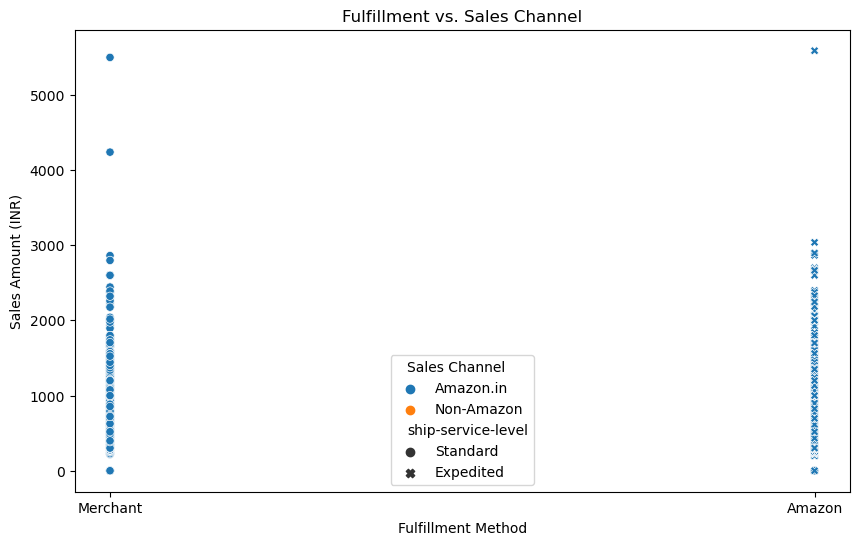

In [10]:
import seaborn as sns
# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Scatter plot showing fulfillment method vs sales channel
plt.figure(figsize=(10, 6))

# Ensure the corrected column names are used
sns.scatterplot(data=df, x='Fulfilment', y='Amount', hue='Sales Channel', style='ship-service-level')

plt.title('Fulfillment vs. Sales Channel')
plt.xlabel('Fulfillment Method')
plt.ylabel('Sales Amount (INR)')
plt.show()


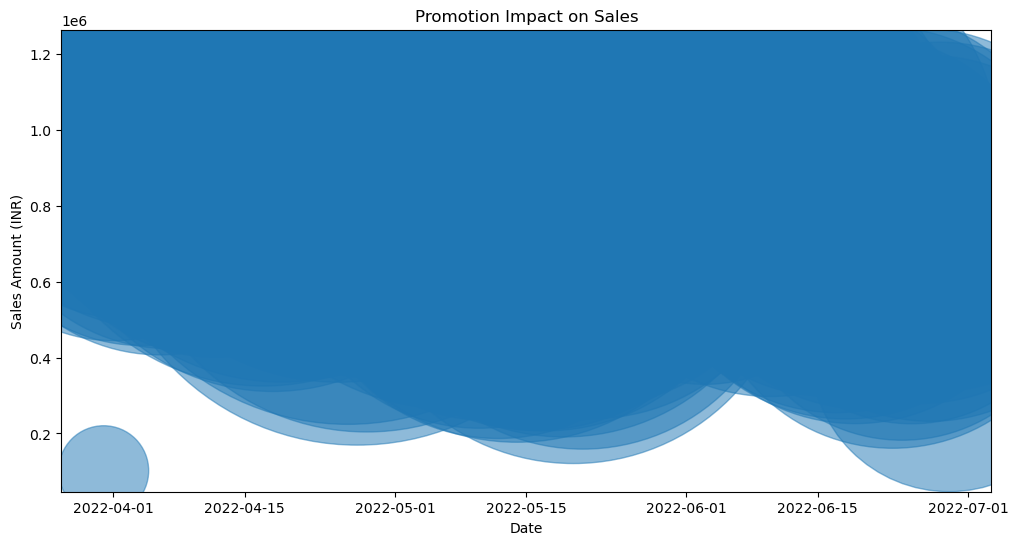

In [11]:
# Count the number of promotions and group by 'Date'
df['promotion_count'] = df['promotion-ids'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(',')))
promotion_sales = df.groupby('Date').agg({'Amount': 'sum', 'promotion_count': 'sum'}).reset_index()

# Bubble plot
plt.figure(figsize=(12, 6))
plt.scatter(promotion_sales['Date'], promotion_sales['Amount'], s=promotion_sales['promotion_count']*10, alpha=0.5)
plt.title('Promotion Impact on Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount (INR)')
plt.show()


In [12]:
# Calculate total sales for each 'SKU'
product_sales_report = df.groupby('SKU')['Amount'].sum().reset_index()

# Display the report
product_sales_report.sort_values(by='Amount', ascending=False).head(10)


,SKU,Amount
1346,J0230-SKD-M,527699.20
4548,JNE3797-KR-L,524581.77
1347,J0230-SKD-S,479937.14
4549,JNE3797-KR-M,454290.16
4550,JNE3797-KR-S,407302.57
4551,JNE3797-KR-XL,332155.24
1345,J0230-SKD-L,305616.95
4552,JNE3797-KR-XS,303616.70
6305,SET268-KR-NP-XL,284058.96
4554,JNE3797-KR-XXXL,276375.80


In [13]:
# Calculate total sales per 'ship-state'
region_sales_report = df.groupby('ship-state')['Amount'].sum().reset_index()

# Display the report
region_sales_report.sort_values(by='Amount', ascending=False).head(10)


,ship-state,Amount
28,MAHARASHTRA,13335534.14
23,KARNATAKA,10481114.37
57,TELANGANA,6916615.65
59,UTTAR PRADESH,6816642.08
56,TAMIL NADU,6515650.11
14,DELHI,4235215.97
24,KERALA,3830227.58
61,WEST BENGAL,3507880.44
1,ANDHRA PRADESH,3219831.72
19,HARYANA,2882092.99


In [14]:
# Calculate sales for each fulfillment method
fulfillment_sales_report = df.groupby('fulfilled-by')['Amount'].sum().reset_index()

# Display the report
fulfillment_sales_report.sort_values(by='Amount', ascending=False).head(10)


,fulfilled-by,Amount
0,Easy Ship,24270527.3


Box Plot: Distribution of Sales Amount by Fulfillment Method

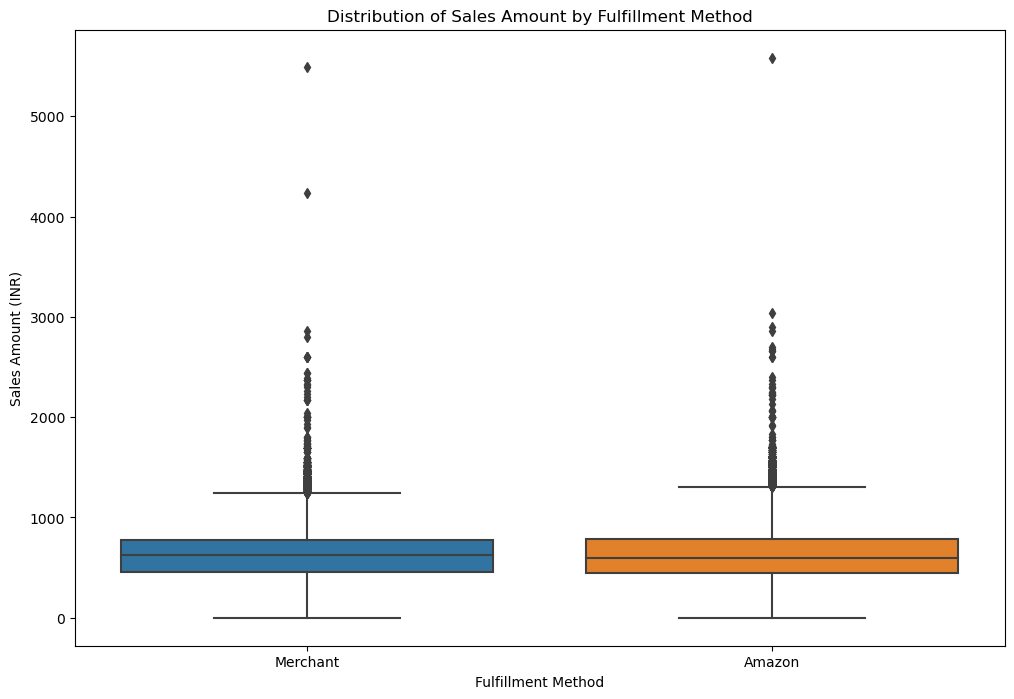

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Fulfilment', y='Amount')
plt.title('Distribution of Sales Amount by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Sales Amount (INR)')
plt.show()


Observation:

The box plot shows the distribution of sales amounts across different fulfillment methods, such as 'Easy Ship' and other methods.
If the median line is higher for a particular fulfillment method, it indicates that it tends to have higher sales amounts.
The spread of the box (interquartile range) reflects the variability in sales amounts, with wider boxes indicating greater variability.
Outliers present in the plot suggest certain orders with unusually high or low sales amounts, which might be influenced by factors like promotions or bulk orders.

Heatmap: Correlation Matrix

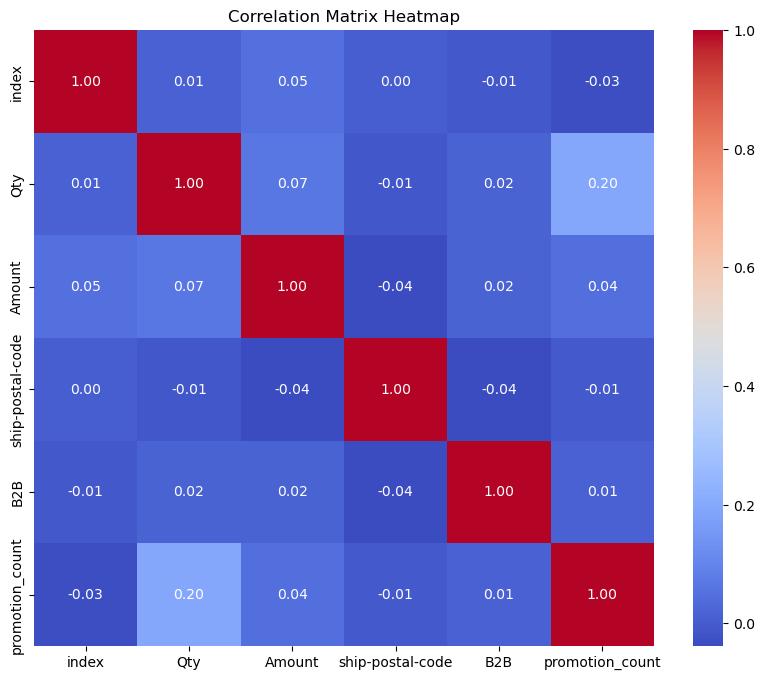

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


Observation:

The heatmap illustrates the correlation between numerical variables such as 'Quantity', 'Amount', and possibly others like 'Promotion-ids'.
A strong positive correlation between 'Quantity' and 'Amount' suggests that higher quantities directly contribute to higher sales, which is expected in a retail context.
If any variables show a strong correlation with 'Amount', those factors could be key drivers of sales and should be further analyzed.
Negative correlations (if present) would indicate an inverse relationship, where one variable increases as the other decreases.

Pair Plot: Relationship Between Multiple Variables

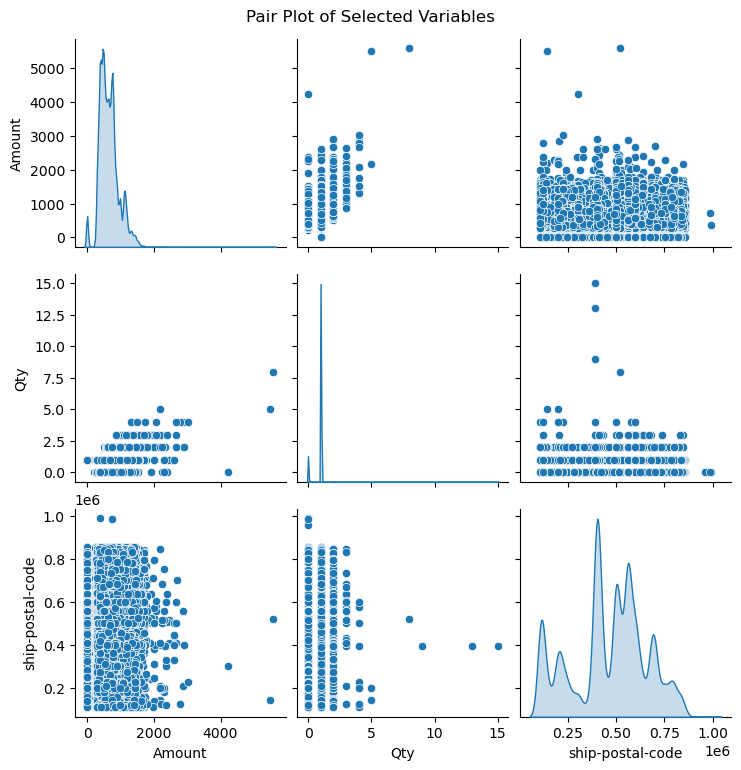

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for pairplot
columns_to_plot = ['Amount', 'Qty', 'ship-postal-code']

sns.pairplot(df[columns_to_plot], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


Observation:

The pair plot reveals relationships between different numerical variables, such as 'Quantity', 'Amount', and any others you choose to include.
Strong linear relationships between variables can be observed, indicating direct associations, like more units leading to higher sales.
Any clusters or distinct groupings might indicate segmentation within the data, such as different types of products or customer behaviors.
Outliers, if present, are clearly visible and could suggest special cases, such as unusually large orders or errors in data entry.

Violin Plot: Sales Distribution by Category

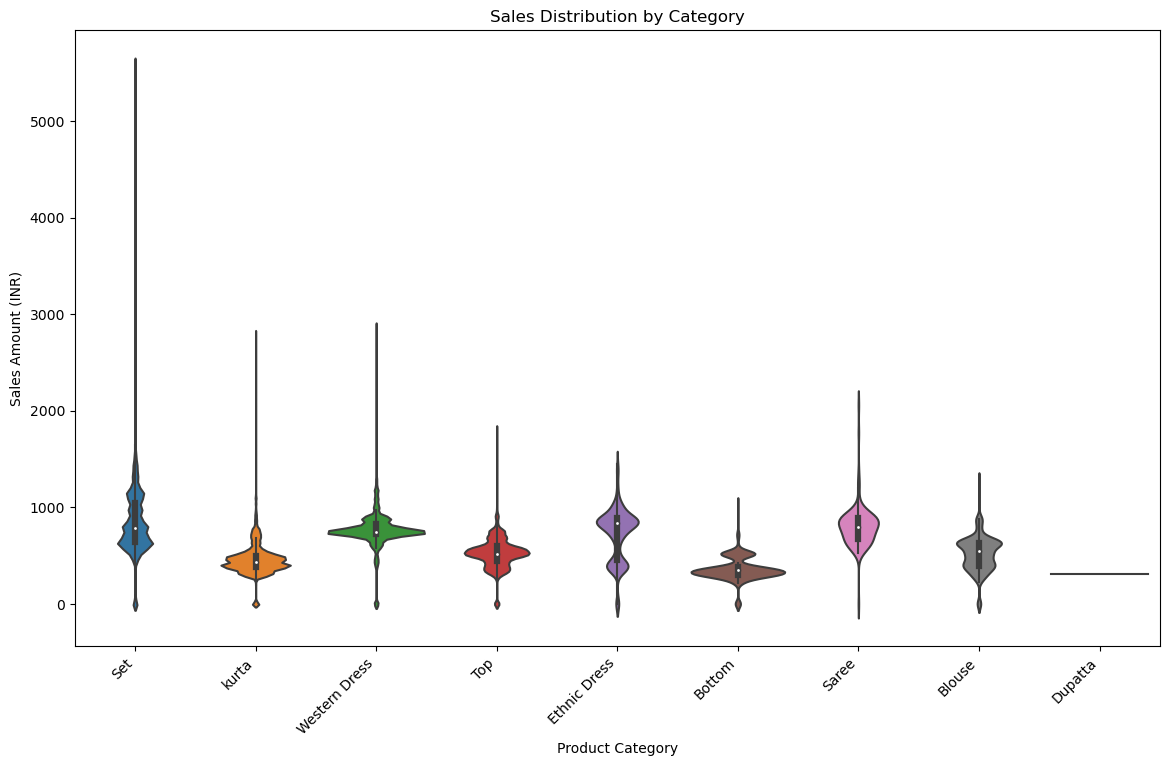

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Category', y='Amount')
plt.title('Sales Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.show()


Observation:

The violin plot shows the distribution of sales amounts across different product categories, like 'Set', 'Kurta', 'Western Dress', etc.
Categories with wider violins at the upper end suggest a concentration of higher sales amounts, indicating potentially premium or popular products.
The shape of the violin can indicate whether the sales are skewed towards higher or lower amounts. A symmetrical shape suggests a balanced distribution, while an asymmetrical shape indicates skewness.
Comparing violins across categories helps identify which categories are performing well and which are lagging.

Facet Grid: Sales Amount Across Different Regions and Fulfillment Methods

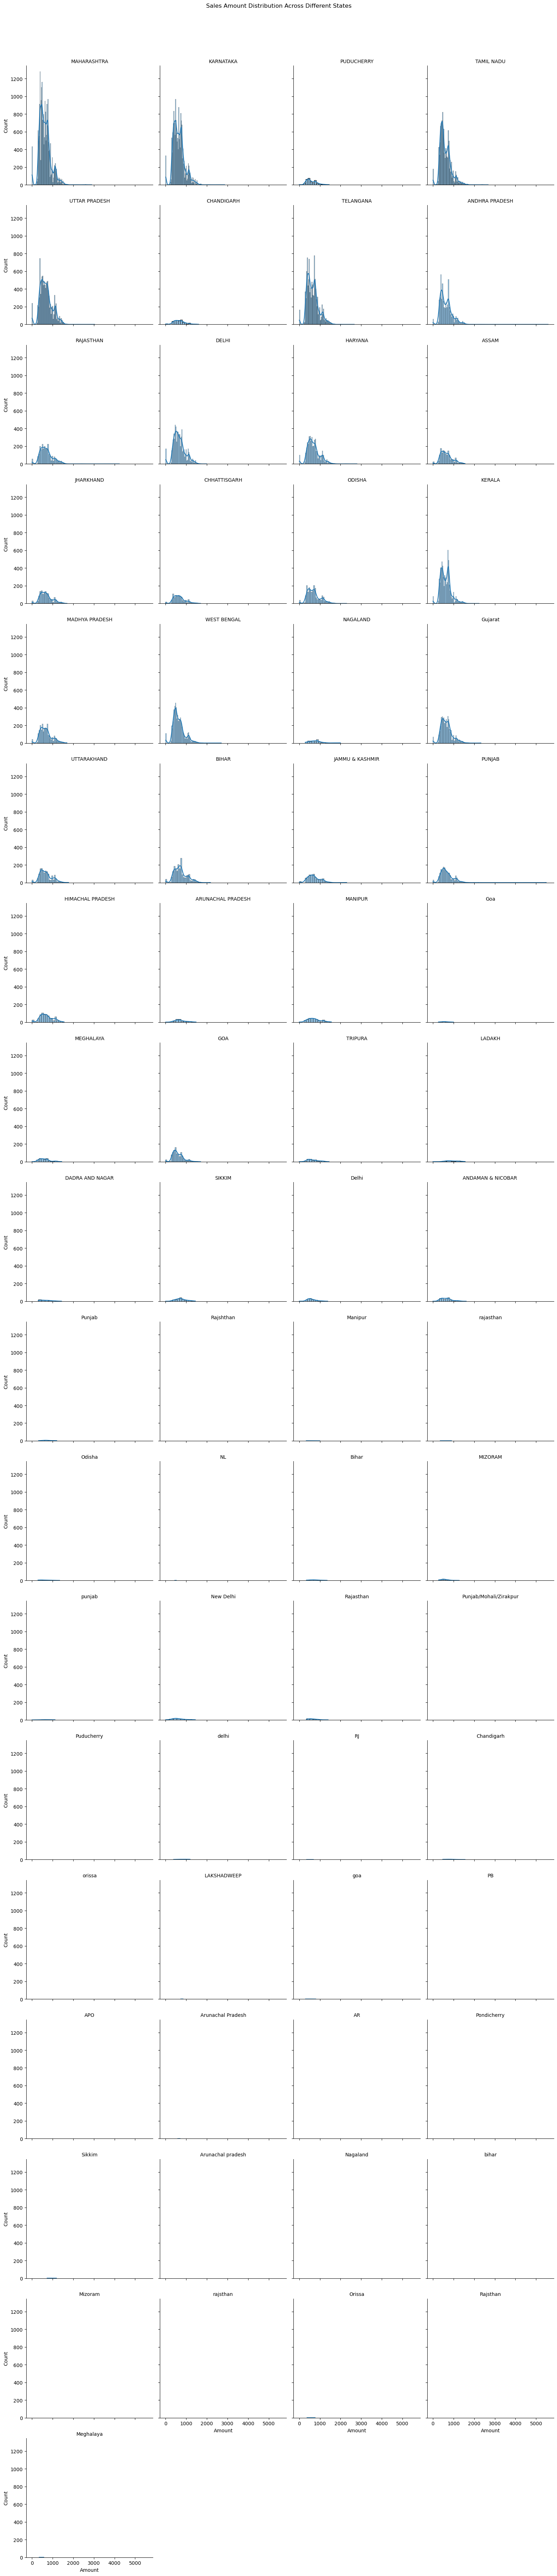

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to show sales amount distribution across regions and fulfillment methods
g = sns.FacetGrid(df, col="ship-state", col_wrap=4, height=4)
g.map(sns.histplot, 'Amount', kde=True)
g.set_titles("{col_name}")
g.fig.suptitle('Sales Amount Distribution Across Different States', y=1.02)
plt.show()


Observation:

The FacetGrid allows for a comparison of sales distributions across different regions (like Maharashtra, Karnataka, etc.) and fulfillment methods.
Regions with a higher concentration of sales could indicate strong market presence or brand popularity in those areas.
Differences in sales patterns between regions might suggest varying customer preferences or market conditions.
The plot helps identify regions where certain fulfillment methods are more effective, possibly due to logistics or customer preferences.

Line Plot: Time Series of Sales Amount

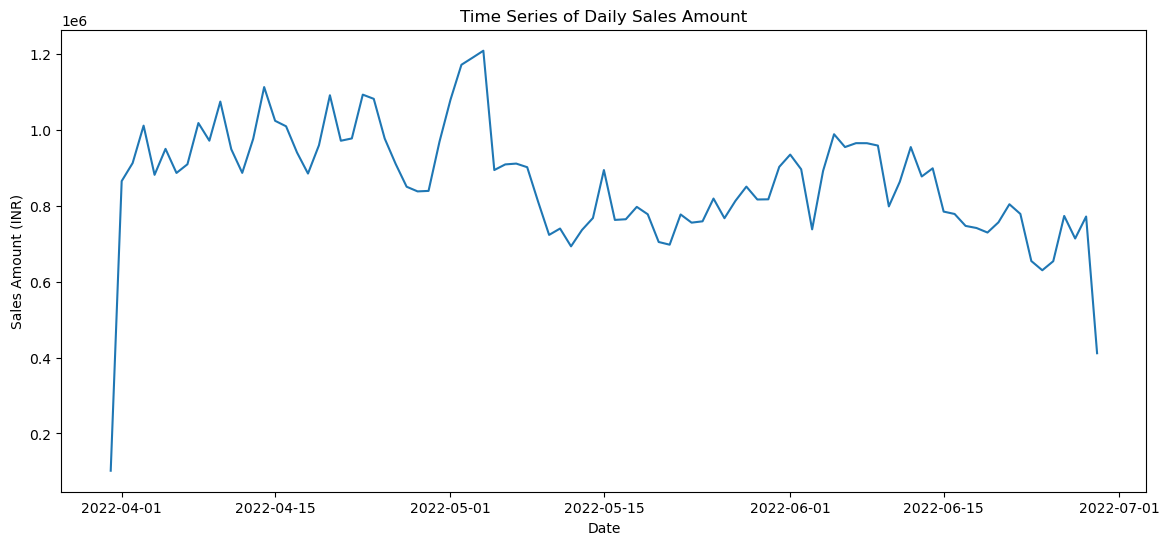

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Grouping by date to get total sales per day
daily_sales = df.groupby('Date')['Amount'].sum()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales)
plt.title('Time Series of Daily Sales Amount')
plt.xlabel('Date')
plt.ylabel('Sales Amount (INR)')
plt.show()


Observation:

The line plot shows how sales amounts change over time, helping to identify trends, peaks, and troughs.
Periods of increased sales might correspond to promotional campaigns, holidays, or new product launches.
Any recurring peaks at specific intervals could indicate seasonal trends, such as higher sales during festive seasons.
A consistent upward or downward trend over time provides insights into the overall growth or decline in sales performance